In [ ]:
#Part One: NLTK

In [259]:
#1. Import the required libraries such as Pandas, NLTK, and Scikit-learn
import pandas as pd
import numpy as np
import nltk
import sklearn
import re
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from summa import summarizer
from nltk import ne_chunk
from nltk.tokenize import word_tokenize
import networkx as nx

In [260]:
#2. Load the "headlines.csv" file into a Pandas data frame
df = pd.read_csv("headlines.csv")
df.head()

,id,headline
0,524288,"For Some, The Decision To Enlist Offers Direction"
1,524289,Whither The Astronauts Without A Shuttle?
2,524292,Tour Winner May Not Be First Over Finish Line
3,262153,California College Students Walk Out Of Class ...
4,524298,New Theory On 'Shaken Baby Syndrome'


In [261]:
#3. Perform text preprocessing on the headlines using NLTK functions such as removing stop words, tokenization, stemming, and lemmatization

#text preprocessing
def preprocess_text(text):
    # Remove punctuations, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    
    return " ".join(lemmatized_tokens)

# Apply the modified preprocessing function to your DataFrame
df['cleaned_headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())
df["preprocessed_headlines"] = df["headline"].apply(preprocess_text)

df.head()

,id,headline,cleaned_headline,preprocessed_headlines
0,524288,"For Some, The Decision To Enlist Offers Direction",for some the decision to enlist offers direction,decis enlist offer direct
1,524289,Whither The Astronauts Without A Shuttle?,whither the astronauts without a shuttle,whither astronaut without shuttl
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may not be first over finish line,tour winner may first finish line
3,262153,California College Students Walk Out Of Class ...,california college students walk out of class ...,california colleg student walk class protest t...
4,524298,New Theory On 'Shaken Baby Syndrome',new theory on shaken baby syndrome,new theori shaken babi syndrom


In [262]:
#4. Perform Part-of-Speech (POS) tagging on the preprocessed headlines using NLTK's POS tagger.

#Uisng Function
def pos(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    
    return pos_tags

# Apply POS tagging to the "preprocessed_headlines" column
df["pos_tags"] = df["preprocessed_headlines"].apply(pos)
df.head()

,id,headline,cleaned_headline,preprocessed_headlines,pos_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",for some the decision to enlist offers direction,decis enlist offer direct,"[(decis, JJ), (enlist, NN), (offer, NN), (dire..."
1,524289,Whither The Astronauts Without A Shuttle?,whither the astronauts without a shuttle,whither astronaut without shuttl,"[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may not be first over finish line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california college students walk out of class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theory on shaken baby syndrome,new theori shaken babi syndrom,"[(new, JJ), (theori, NN), (shaken, VBN), (babi..."


In [263]:
#5. Perform Named Entity Recognition (NER) on the preprocessed headlines using NLTK's NER tagger

df['named_entities'] = df['preprocessed_headlines'].apply(lambda x: ne_chunk(nltk.pos_tag(word_tokenize(x))))
df.head()

,id,headline,cleaned_headline,preprocessed_headlines,pos_tags,named_entities
0,524288,"For Some, The Decision To Enlist Offers Direction",for some the decision to enlist offers direction,decis enlist offer direct,"[(decis, JJ), (enlist, NN), (offer, NN), (dire...","[(decis, JJ), (enlist, NN), (offer, NN), (dire..."
1,524289,Whither The Astronauts Without A Shuttle?,whither the astronauts without a shuttle,whither astronaut without shuttl,"[(whither, RB), (astronaut, NN), (without, IN)...","[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may not be first over finish line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ...","[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california college students walk out of class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)...","[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theory on shaken baby syndrome,new theori shaken babi syndrom,"[(new, JJ), (theori, NN), (shaken, VBN), (babi...","[(new, JJ), (theori, NN), (shaken, VBN), (babi..."


In [264]:
#6. Use CountVectorizer and TF-IDF vectorizer for classification based on content

# CountVectorizer
count_vectorizer = CountVectorizer()
count_vectors = count_vectorizer.fit_transform(df['preprocessed_headlines'])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['preprocessed_headlines'])


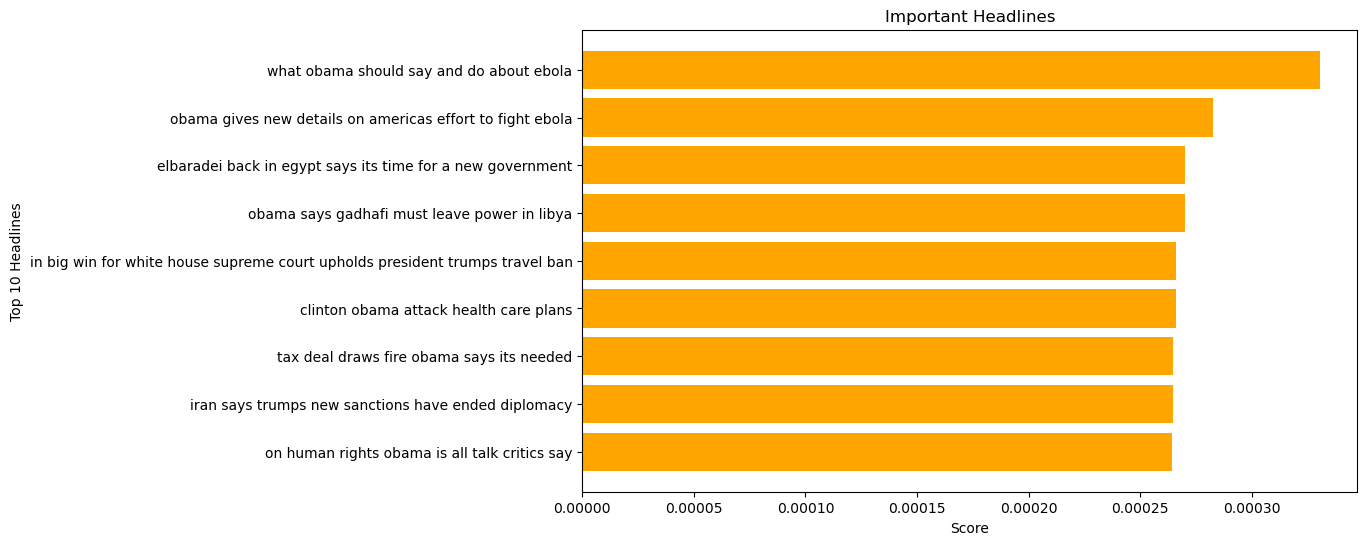

In [265]:
#7. Generate a summary of the news headlines using the TextRank algorithm or other summarization techniques. The summary will consist of the top 10 most important sentences in the article
headlines = df['cleaned_headline'].tolist()
def text_summarization(tfidf_vectors):
    cosine_matrix = cosine_similarity(tfidf_vectors)
    nx_graph = nx.from_numpy_array(cosine_matrix)
    rank = nx.pagerank(nx_graph)
    return sorted(((rank[i], s) for i, s in enumerate(headlines)), reverse=True)[:10]

summary_nltk = text_summarization(tfidf_vectors)
# Extract headline scores and headlines

# Extract headline scores and headlines
headline_scores = [headline[0] for headline in summary_nltk]
top_headlines = [headline[1] for headline in summary_nltk]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_headlines, headline_scores, color='orange')
plt.xlabel('Score')
plt.ylabel('Top 10 Headlines')
plt.title('Important Headlines')
plt.gca().invert_yaxis() 
plt.show()

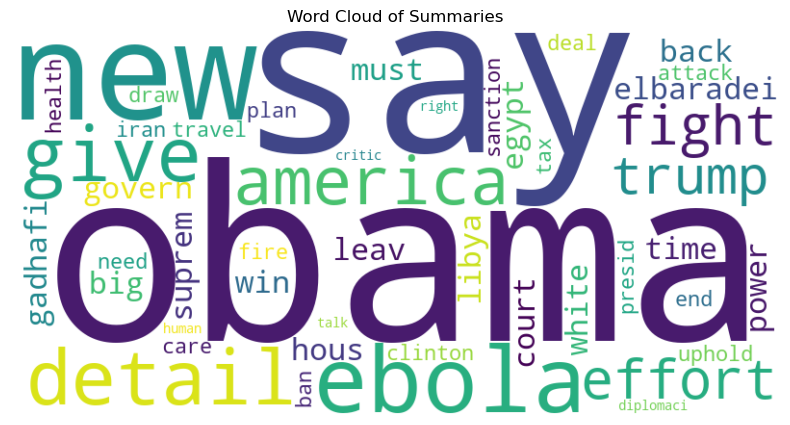

In [266]:
# Generate a word cloud from the 'summary' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(summary_top))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Summaries")
plt.show()

#Part Two: (spaCy and scikit-learn)

In [267]:
#1. Utilize spaCy for Part Two
import pandas as pd
import spacy
import re
from spacy.pipeline import TextCategorizer, Sentencizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import numpy as np
from summa import summarizer

# Initialize spaCy
nlp = spacy.load("en_core_web_sm")

In [268]:
#2. Use the same "headlines.csv" dataset as the input file
df = pd.read_csv("headlines.csv")

In [269]:
#3. Preprocess the headlines using spaCy functions such as removing stop words, tokenization, stemming, and lemmatization
# Define a function for preprocessing
def preprocess(text):
    text = re.sub(r'[^a-zA-Z0-9_\s]+', '', text)
    text = text.lower()
    doc = nlp(text)
    # Remove stop words, perform stemming, and lemmatization
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Apply preprocessing to the headlines
df['preprocessed_headlines'] = df['headline'].apply(preprocess)
df.head()

,id,headline,preprocessed_headlines
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offer direction
1,524289,Whither The Astronauts Without A Shuttle?,astronaut shuttle
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line
3,262153,California College Students Walk Out Of Class ...,california college student walk class protest ...
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shake baby syndrome


In [270]:
#4. Perform Part-of-Speech (POS) tagging on the preprocessed headlines using spaCy's POS tagger
# Function to perform POS tagging on preprocessed text
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Apply POS tagging to the preprocessed headlines
df["pos_tags"] = df["preprocessed_headlines"].apply(pos_tagging)
df.head()

,id,headline,preprocessed_headlines,pos_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offer direction,"[(decision, NOUN), (enlist, NOUN), (offer, NOU..."
1,524289,Whither The Astronauts Without A Shuttle?,astronaut shuttle,"[(astronaut, PROPN), (shuttle, NOUN)]"
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),..."
3,262153,California College Students Walk Out Of Class ...,california college student walk class protest ...,"[(california, PROPN), (college, PROPN), (stude..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shake baby syndrome,"[(new, ADJ), (theory, NOUN), (shake, VERB), (b..."


In [271]:
#5. Perform Named Entity Recognition (NER) on the preprocessed headlines using spaCy's NER tagger
# Perform NER on preprocessed text
def ner_tagging(text):
    doc = nlp(text)
    if doc.ents:
        return [(ent.text, ent.label_) for ent in doc.ents]
    else:
        return ['No named entities found']

# Apply NER tagging to the preprocessed headlines
df["ner_tags"] = df["preprocessed_headlines"].apply(ner_tagging)
df.head()

,id,headline,preprocessed_headlines,pos_tags,ner_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offer direction,"[(decision, NOUN), (enlist, NOUN), (offer, NOU...",[No named entities found]
1,524289,Whither The Astronauts Without A Shuttle?,astronaut shuttle,"[(astronaut, PROPN), (shuttle, NOUN)]",[No named entities found]
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),...",[No named entities found]
3,262153,California College Students Walk Out Of Class ...,california college student walk class protest ...,"[(california, PROPN), (college, PROPN), (stude...","[(california, GPE)]"
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shake baby syndrome,"[(new, ADJ), (theory, NOUN), (shake, VERB), (b...",[No named entities found]


In [105]:
#6. Utilize spaCy's pipeline object to efficiently perform text processing tasks
# Define the custom spaCy pipeline
def custom_pipeline(text):
    # Preprocessing
    text = re.sub(r'[^a-zA-Z0-9_\s]+', '', text)
    text = text.lower()
    
    # Tokenization, POS tagging, and NER tagging
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    if doc.ents:
        ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
    else:
        ner_tags = ['No named entities found']
    
    # Remove stop words, perform stemming, and lemmatization
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    return {
        "Preprocessed Text": ' '.join(tokens),
        "POS Tags": pos_tags,
        "NER Tags": ner_tags,
    }

# Load the spaCy model with the desired components
nlp = spacy.load("en_core_web_sm")

# Apply the custom spaCy pipeline to the headlines
df_processed = df["headline"].apply(custom_pipeline)

# Create a new DataFrame with the processed data
processed_df = pd.DataFrame(list(df_processed))

# Concatenate the processed DataFrame with the original DataFrame
df_result = pd.concat([df, processed_df], axis=1)

# Print the DataFrame with processed data
df_result.head()


,id,headline,preprocessed_headlines,pos_tags,ner_tags,Preprocessed Text,POS Tags,NER Tags
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offer direction,"[(decision, NOUN), (enlist, NOUN), (offer, NOU...",[No named entities found],decision enlist offer direction,"[(for, ADP), (some, DET), (the, DET), (decisio...",[No named entities found]
1,524289,Whither The Astronauts Without A Shuttle?,astronaut shuttle,"[(astronaut, PROPN), (shuttle, NOUN)]",[No named entities found],astronaut shuttle,"[(whither, VERB), (the, DET), (astronauts, NOU...",[No named entities found]
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),...",[No named entities found],tour winner finish line,"[(tour, NOUN), (winner, NOUN), (may, AUX), (no...","[(first, ORDINAL)]"
3,262153,California College Students Walk Out Of Class ...,california college student walk class protest ...,"[(california, PROPN), (college, PROPN), (stude...","[(california, GPE)]",california college student walk class protest ...,"[(california, PROPN), (college, PROPN), (stude...","[(california, GPE)]"
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shake baby syndrome,"[(new, ADJ), (theory, NOUN), (shake, VERB), (b...",[No named entities found],new theory shake baby syndrome,"[(new, ADJ), (theory, NOUN), (on, ADP), (shake...",[No named entities found]


In [272]:
#7. Use scikit-learn's TfidfVectorizer and LinearSVC in a pipeline for text vectorization and classification
#  Word2Vec embeddings for the text data
corpus = [text.split() for text in df['preprocessed_headlines']]
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, sg=0)
def get_doc_embedding(text, model):
    words = text.split()
    word_embeddings = [model.wv[word] for word in words if word in model.wv]
    if word_embeddings:
        doc_embedding = np.mean(word_embeddings, axis=0)
        return doc_embedding
    else:
        return np.zeros(model.vector_size)

df['doc_embedding'] = df['preprocessed_headlines'].apply(lambda x: get_doc_embedding(x, model))
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(list(df['doc_embedding']))
cluster_labels = {
    0: 'Positive',
    1: 'Negative'
}
df['label'] = df['cluster'].map(cluster_labels)
df.head()


/Users/nirant/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,headline,preprocessed_headlines,pos_tags,ner_tags,doc_embedding,cluster,label
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offer direction,"[(decision, NOUN), (enlist, NOUN), (offer, NOU...",[No named entities found],"[-0.005739082, 0.021638138, 0.007889119, 0.004...",0,Positive
1,524289,Whither The Astronauts Without A Shuttle?,astronaut shuttle,"[(astronaut, PROPN), (shuttle, NOUN)]",[No named entities found],"[-0.009875214, 0.004248078, 0.004530225, 0.006...",0,Positive
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),...",[No named entities found],"[-0.0067268796, 0.018306406, 0.01034632, 0.005...",0,Positive
3,262153,California College Students Walk Out Of Class ...,california college student walk class protest ...,"[(california, PROPN), (college, PROPN), (stude...","[(california, GPE)]","[-0.022836074, 0.047958326, 0.027706373, 0.009...",0,Positive
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shake baby syndrome,"[(new, ADJ), (theory, NOUN), (shake, VERB), (b...",[No named entities found],"[-0.027579168, 0.06419008, 0.038929828, 0.0186...",1,Negative


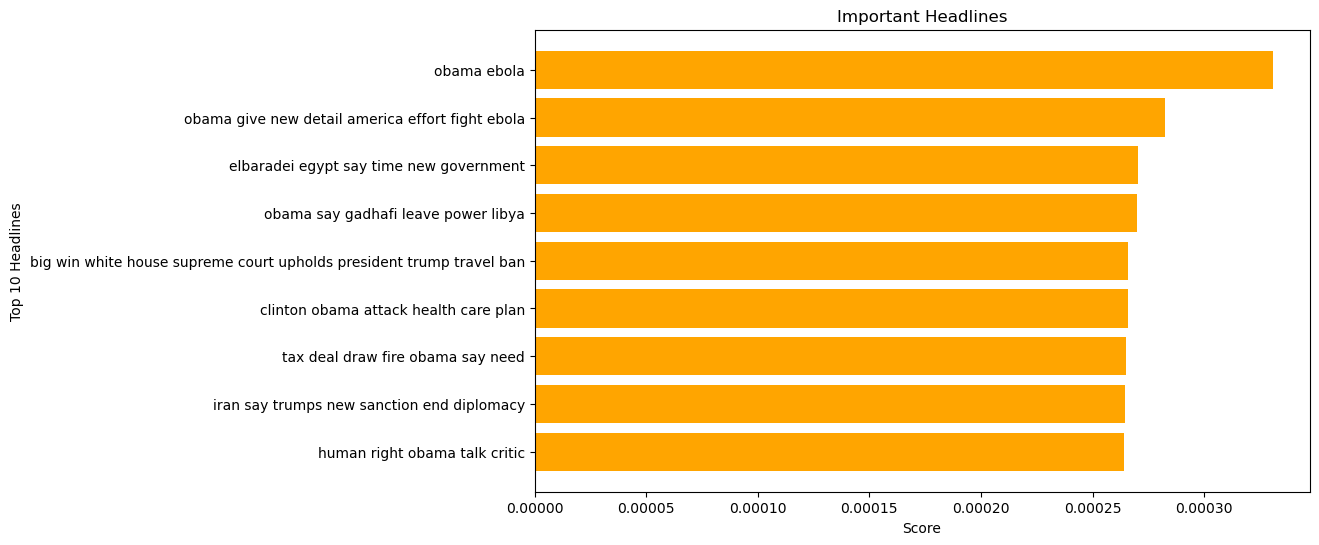

In [273]:
#8. Generate a summary of the news headlines using the TextRank algorithm or other summarization techniques. The summary will consist of the top 10 most important sentences in the article
headlines = df['preprocessed_headlines'].tolist()
def text_summarization(tfidf_vectors):
    cosine_matrix = cosine_similarity(tfidf_vectors)
    nx_graph = nx.from_numpy_array(cosine_matrix)
    rank = nx.pagerank(nx_graph)
    return sorted(((rank[i], s) for i, s in enumerate(headlines)), reverse=True)[:10]

summary_spacy = text_summarization(tfidf_vectors)
# Extract headline scores and headlines
headline_scores = [headline[0] for headline in summary_spacy]
top_headlines = [headline[1] for headline in summary_spacy]

plt.figure(figsize=(10, 6))
plt.barh(top_headlines, headline_scores, color='orange')
plt.xlabel('Score')
plt.ylabel('Top 10 Headlines')
plt.title('Important Headlines')
plt.gca().invert_yaxis() 
plt.show()

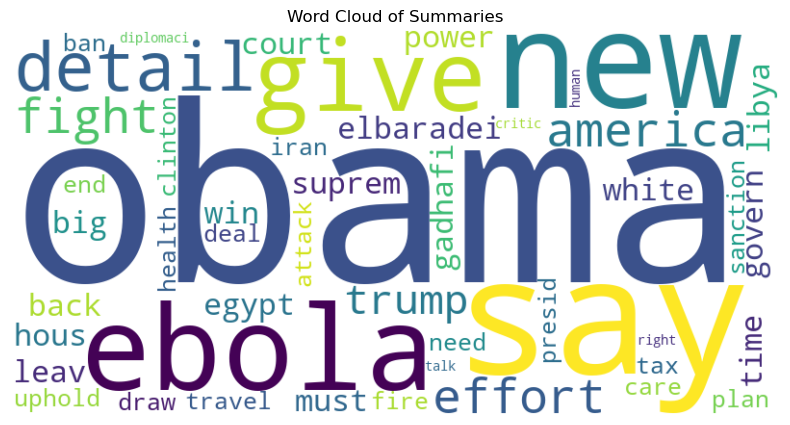

In [248]:
#9. Visualize the summary using matplotlib or other visualization tools
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(summary_top))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Summaries")
plt.show()

In [283]:
from IPython.display import display, HTML
nltk_df = pd.DataFrame({'NLTK Summaries': summary_nltk})
spacy_df = pd.DataFrame({'spaCy Summaries': summary_spacy})

nltk_sentences = [sentence[1] for sentence in summary_nltk]
spacy_sentences = [sentence[1] for sentence in summary_spacy]
#DataFrame to display sentence comparison
comparison_df = pd.DataFrame({'NLTK Summaries': nltk_sentences, 'spaCy Summaries': spacy_sentences})

#Display the sentence comparison DataFrame
display(HTML("<h2>Comparison between NLTK and spaCy Summaries</h2>"))
display(HTML(comparison_df.to_html(index=False)))

NLTK Summaries,spaCy Summaries
what obama should say and do about ebola,obama ebola
obama gives new details on americas effort to fight ebola,obama give new detail america effort fight ebola
obama gives new details on americas effort to fight ebola,obama give new detail america effort fight ebola
elbaradei back in egypt says its time for a new government,elbaradei egypt say time new government
obama says gadhafi must leave power in libya,obama say gadhafi leave power libya
in big win for white house supreme court upholds president trumps travel ban,big win white house supreme court upholds president trump travel ban
clinton obama attack health care plans,clinton obama attack health care plan
tax deal draws fire obama says its needed,tax deal draw fire obama say need
iran says trumps new sanctions have ended diplomacy,iran say trumps new sanction end diplomacy
on human rights obama is all talk critics say,human right obama talk critic
